#  用肘部法选择K值   
该方法使用不同的k值绘制出代价函数的值。         
随着k值的增加，平均偏差会增加，每个聚类将包含更少的实例，且平均离差的提升会减少。      
肘部：离差提升变化下降最陡时的k值

Text(0.5, 1.0, 'example')

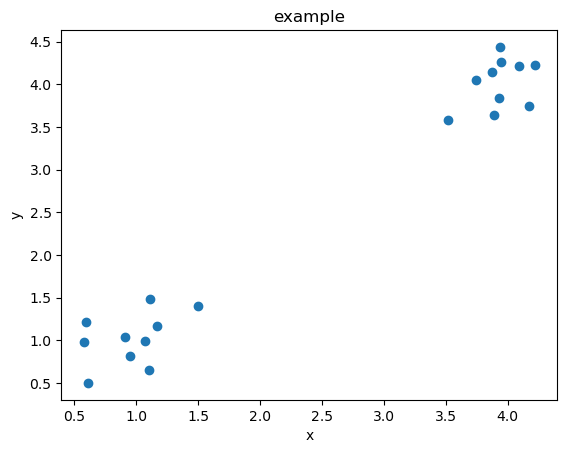

In [7]:
import numpy as np 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt 

c1x = np.random.uniform(0.5,1.5,(1,10))
c1y = np.random.uniform(0.5,1.5,(1,10))

c2x = np.random.uniform(3.5, 4.5, (1,10))
c2y = np.random.uniform(3.5,4.5, (1,10))

x = np.hstack((c1x,c2x))
y = np.hstack((c1y,c2y))

X = np.vstack((x,y)).T

plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('example')

d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
d:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

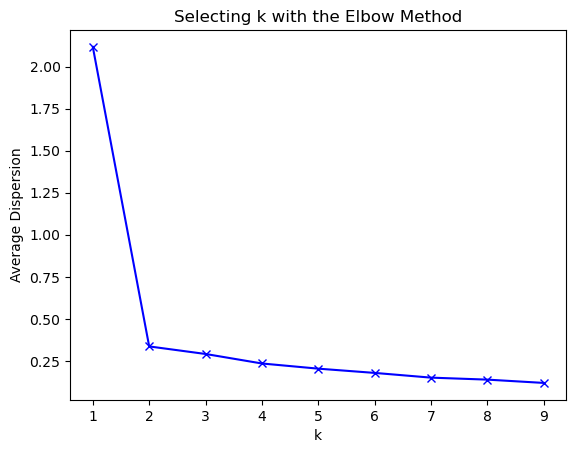

In [8]:
K = range(1,10)
meanDispersions = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_, 'euclidean'), axis=1))/X.shape[0])

plt.plot(K, meanDispersions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average Dispersion')
plt.title('Selecting k with the Elbow Method')
plt.show()

可以看出k从1增加到2时，平均离差迅速提升；     
而k值大于2时离差几乎没有提升，也就是k从2到3的平均离差的提升率下降最快。   
此处数据集的k应该设置为3

# 评估聚类     
轮廓系数：对聚类紧密程度和稀疏程度的衡量，当聚类的质量上升时轮系数上升。        
当聚类内部很紧密且彼此之前距离很远时，轮廓系数很大。    

 